# KNN Classifier

## Importing and Loading data

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

base_path = r'\Users\KAYEG\Documents\ASU\FALL - 21 - Term 7\Machine Learning\Project\Project\\'
datas_path = r'\Users\KAYEG\Documents\ASU\FALL - 21 - Term 7\Machine Learning\Project\Project\datas\\'

---

# Utility Functions

## Display Confusion Matrix

In [60]:
def display_conf_mat(name, tn, fp, fn, tp):
    print(f'{name} confusion matrix: \n T.neg {tn} \t F.pos {fp} \n F.neg {fn} \t T.pos {tp}\n')

---

In [2]:
original_df = pd.read_csv(datas_path + r'data.csv', index_col=0)
original_df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## Loading Preprocessed Datasets

In [42]:
z_score_location_country = pd.read_csv(datas_path + r'z_score_location_country.csv')
min_max_location_country = pd.read_csv(datas_path + r'min_max_location_country.csv')
one_hot_location_country = pd.read_csv(datas_path + r'one_hot_location_country.csv')
dfs = {
    'Original Dataframe': {'df': original_df, 'accuracy': [], 'max_acc': -1, 'k': -1},
    'Z Score Location and Country': {'df': z_score_location_country, 'accuracy': [], 'max_acc': -1, 'k': -1},
    'Min-Max Location and Country': {'df': min_max_location_country, 'accuracy': [], 'max_acc': -1, 'k': -1},
    'one_hot_location_country': {'df': one_hot_location_country, 'accuracy': [], 'max_acc': -1, 'k': -1}
}

In [43]:
for name in dfs.keys():
#     print(name)
    df = dfs[name]['df']
    
    # Splitting features from labels
    X = df.iloc[:, :-1].values # features matrix
    y = df.iloc[:, -1].values # label vector
    
    # 80% - 20% split is applied
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    
    # KNN Model
    for k in range(1, 20, 2):
        knn_class = KNeighborsClassifier(n_neighbors=k) # KNN model
        knn_class.fit(x_train, y_train) #
        y_predict = knn_class.predict(x_test)
                
        sk_acc_score = accuracy_score(y_test, y_predict) * 100
        dfs[name]['accuracy'].append(sk_acc_score)
#         print(name, ' accuracy is with k = ', k, ' is ', sk_acc_score)
#     print('\n' + '-' * 10 + '\n')

In [129]:
best_acc = -1
best_acc_df = '-'
for name in dfs.keys():

    
    dfs[name]['max_acc'] = max(dfs[name]['accuracy'])
    dfs[name]['k'] = 1 + dfs[name]['accuracy'].index(dfs[name]['max_acc'])*2
    
    if (dfs[name]['max_acc'] > best_acc):
        best_acc = dfs[name]['max_acc']
        best_acc_df = name
        
    print(name, dfs[name]['max_acc'], dfs[name]['k'], '\n\n')


df = dfs[best_acc_df]['df']
opt_k = dfs[best_acc_df]['k']
print('Dataframe with best accuracy is "', best_acc_df, '" with k = ', opt_k, sep='')

Original Dataframe 95.95375722543352 3 


Z Score Location and Country 95.37572254335261 1 


Min-Max Location and Country 94.79768786127167 5 


one_hot_location_country 95.37572254335261 3 


Dataframe with best accuracy is "Original Dataframe" with k = 3


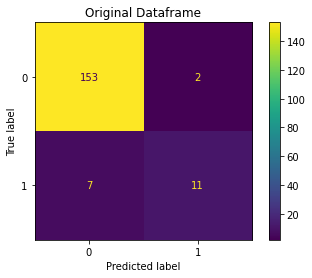

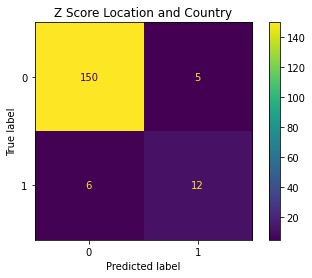

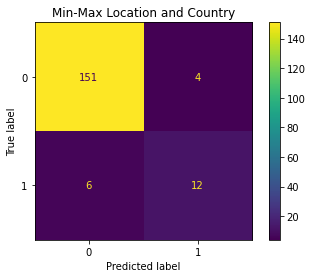

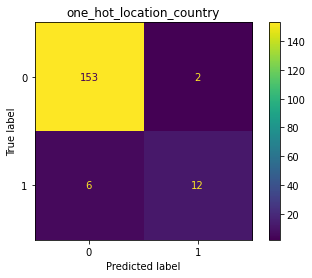

In [127]:
for name in dfs.keys():
    df = dfs[name]['df']
    
    X = df.iloc[:, :-1].values # features matrix
    y = df.iloc[:, -1].values # label vector
    
    # 70% - 30% split is applied
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    
    knn_class = KNeighborsClassifier(n_neighbors=dfs[name]['k']) # KNN model
    knn_class.fit(x_train, y_train)
    y_predict = knn_class.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = conf_mat.ravel()
    
#     display_conf_mat(name, tn, fp, fn, tp)
    cm_display = ConfusionMatrixDisplay(conf_mat).plot()
    plt.title(name)

---

# Implementing KNN

## Concept

- Calculate distance from point to point --> distance between target and point
    - target = [x, y, z]
    - points = [a, b, c]
    
    - squared = [(x - a)^2, (y - b)^2, (z - c)^2]
    - sum_arr = sum(squared) == (x - a)^2 + (y - b)^2 + (z - c)^2
    - distance = sqrt(sum_arr)
    
    
- Repeat with all features --> array of distances


- Sort ascendingly --> sorted array of distances


- Take first K distances --> array of K distances


- Predict based on majority --> prediction 

In [40]:
class KNN_Classifier:
    
    def __init__(self, k, power):
        self.k = k
        self.power = power
    
    
    def save_data(self, features, labels):
        self.features = np.array(features)
        self.labels = np.array(labels)
        
    
    def get_distances(self, target):
        target = np.array(target)
        distances = np.sum((self.features - target)**2, axis = 1)

        return np.array(distances)
            
    
    def majority_vote(self, distances):
        k_nearest_labels = self.labels[np.argsort(distances)[:self.k]]
        unique_labels, frequency = np.unique(k_nearest_labels, return_counts=True)
        max_frequency = np.max(frequency)
        mode = []
        
        for i in range(len(frequency)):
            if (frequency[i] == max_frequency):
                mode.append(unique_labels[i])
        
        return mode[0]

    
    def predict(self, targets):
        targets = np.array(targets)
        predictions = []
        
        for i, target in enumerate(targets):
            distances = self.get_distances(target)
            prediction = self.majority_vote(distances)
            predictions.append(prediction)
        
        return np.array(predictions)
        
        

# Measuring Performance

In [130]:
#current data - Original Data Set
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [50]:
# Splitting features from labels
X = df.iloc[:, :-1].values # features matrix
y = df.iloc[:, -1].values # label vector

# 80% - 20% split is applied
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [140]:
# SKLearn KNN Model
start = time.time()

sk_knn = KNeighborsClassifier(n_neighbors=opt_k) # KNN model with K = 9
sk_knn.fit(x_train, y_train) #
sk_y_predict = knn_class.predict(x_test)

sk_acc_score = accuracy_score(y_test, sk_y_predict) * 100
sk_conf_mat = confusion_matrix(y_test, sk_y_predict)
sk_class_report = classification_report(y_test, sk_y_predict, target_names=['Negative Class (survived)', 'Positive Class (died)'])

end = time.time()
sk_execution_time = end - start

In [147]:
# Implemented Model
start = time.time()

our_knn = KNN_Classifier(opt_k, 2)
our_knn.save_data(x_train, y_train)
our_y_predict = knn.predict(x_test)

our_acc_score = accuracy_score(y_test, our_y_predict) * 100
our_conf_mat = confusion_matrix(y_test, our_y_predict)
our_class_report = classification_report(y_test, sk_y_predict, target_names=['Negative Class (survived)', 'Positive Class (died)'])

end = time.time()
our_execution_time = end - start

SKLearn Model Performance Metrics 

SKLearn Execution Time 0.012994527816772461
SKLearn Model Accuracy:  95.37572254335261 


                            precision    recall  f1-score   support

Negative Class (survived)       0.96      0.99      0.97       155
    Positive Class (died)       0.86      0.67      0.75        18

                 accuracy                           0.95       173
                macro avg       0.91      0.83      0.86       173
             weighted avg       0.95      0.95      0.95       173



Text(0.5, 1.0, 'SKLearn Model Confustion Matrix')

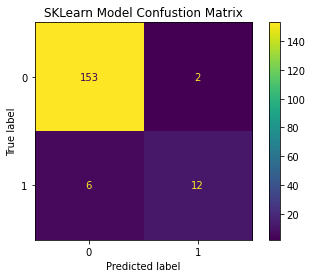

In [137]:
print('SKLearn Model Performance Metrics', '\n')
print('SKLearn Execution Time', sk_execution_time)
print('SKLearn Model Accuracy: ', sk_acc_score, '\n')
# display_conf_mat('SkLearn Model', sk_tn, sk_fp, sk_fn, sk_tp)
print('\n', sk_class_report)
ConfusionMatrixDisplay(sk_conf_mat).plot()
plt.title("SKLearn Model Confustion Matrix")

Implemented Model Performance Metrics 

Implemented Model Execution Time 0.2078850269317627 

Implemented Model Accuracy:  95.37572254335261 


                            precision    recall  f1-score   support

Negative Class (survived)       0.96      0.99      0.97       155
    Positive Class (died)       0.86      0.67      0.75        18

                 accuracy                           0.95       173
                macro avg       0.91      0.83      0.86       173
             weighted avg       0.95      0.95      0.95       173



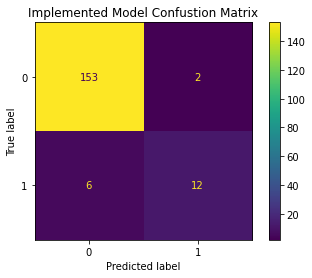

In [139]:
print('Implemented Model Performance Metrics', '\n')
print('Implemented Model Execution Time', our_execution_time, '\n')
print('Implemented Model Accuracy: ', our_acc_score, '\n')
# display_conf_mat('Implemented Model', our_tn, our_fp, our_fn, our_tp)
print('\n', our_class_report)
ConfusionMatrixDisplay(our_conf_mat).plot();
plt.title("Implemented Model Confustion Matrix");

In [116]:
print('Comparison', '\n')
print('SKLeanr Model Accuracy - Implemented Model Accuracy = ', sk_acc_score - our_acc_score)
print('Implemented Model Execution Time - SKLeanr Model Execution Time = ', our_execution_time - sk_execution_time)
print('(Implemented Model Execution Time - SKLeanr Model Execution Time) / Implemented Model Execution Time  = ', (our_execution_time - sk_execution_time) / our_execution_time )

Comparison 

SKLeanr Model Accuracy - Implemented Model Accuracy =  0.0
Implemented Model Execution Time - SKLeanr Model Execution Time =  0.20288419723510742
(Implemented Model Execution Time - SKLeanr Model Execution Time) / Implemented Model Execution Time  =  0.9398239979501769


# ROC/AUC 

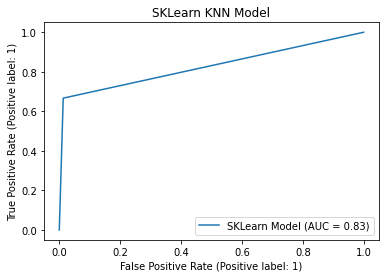

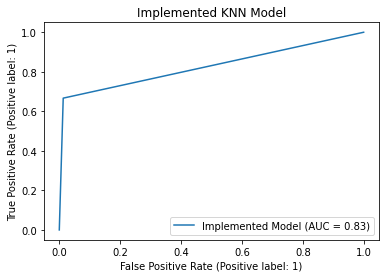

In [168]:
RocCurveDisplay.from_predictions(y_test, sk_y_predict, name='SKLearn Model')
plt.title('SKLearn KNN Model')

RocCurveDisplay.from_predictions(y_test, our_y_predict, name='Implemented Model')
plt.title('Implemented KNN Model');


# Trash Code

In [54]:
acc = []
maxx = 0
max_k = -1
start = time.time()
for k in range(1, 100, 2):
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(x_train, y_train)
    y_predict = knn_class.predict(x_test)
    
    sk_acc_score = accuracy_score(y_test, y_predict) * 100
    acc.append(sk_acc_score)
    if(sk_acc_score > maxx):
        maxx = sk_acc_score
        max_k = k
end = time.time()
print(f"Execution time {end - start}")

Execution time 0.4047667980194092


In [55]:
max_k

3

In [56]:
acc = []
maxx = 0
max_k = -1

start = time.time()

for k in range(1, 100, 2):
    knn = KNN_Classifier(k, 2)
    knn.save_data(x_train, y_train)
    my_predictions = knn.predict(x_test)
    my_acc_score = accuracy_score(y_test, my_predictions) * 100
    acc.append(my_acc_score)
    if(my_acc_score > maxx):
        maxx = my_acc_score
        max_k = k

end = time.time()
print(f"Execution time {end - start}")

Execution time 0.8753373622894287


In [57]:
max_k

3

# Finding Prerocessing Technique that Yields the Highest Accuracy

In [19]:
for name, df in dfs.items():
    print(name)
    
    # Splitting features from labels
    X = df.iloc[:, :-1].values # features matrix
    y = df.iloc[:, -1].values # label vector
    
    # 70% - 30% split is applied
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=7)
    
    # KNN Model
    for k in range(1, 20, 2):
        knn_class = KNeighborsClassifier(n_neighbors=k) # KNN model with K = 9
        knn_class.fit(x_train, y_train) #
        y_predict = knn_class.predict(x_test)

        sk_acc_score = accuracy_score(y_test, y_predict) * 100
        print(name, ' accuracy is with k = ', k, ' is ', sk_acc_score)
    print('\n' + '-' * 10 + '\n')

Original Dataframe


AttributeError: 'dict' object has no attribute 'iloc'

# Splitting Data

## Features - Label Split

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X.shape, y.shape)

### Train - Validation - Test Split

In [ ]:
# 60% 20% 20% split is applied
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)
# print('\nX Train', x_train.shape, 'Y Train', y_train.shape, '\nX Test', x_test.shape, 'Y Test', y_test.shape,
#       '\nX Val', x_val.shape, 'Y Val', y_val.shape)

# SciKit-Learn Algorithm

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(x_train, y_train)
y_predict = knn_class.predict(x_test)

## Training and Predicting

## Performance

In [ ]:
sk_acc_score = accuracy_score(y_test, y_predict) * 100
sk_acc_score

In [ ]:
precision_recall_fscore_support(y_test, y_predict)